In [107]:
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [108]:
df = pd.read_excel('KEL321-XLS-ENG.xls', sheet_name='DoubleClick')

In [109]:
pd.set_option('display.max_columns', None)
df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,Status,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,Live,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,Paused,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,Deactivated,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,Unavailable,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,Paused,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


### 1. (50 Points) Please add four additional metrics into your data using the formula provided

a. Net Revenue (Amount (total revenue) – Total Cost))

In [110]:
df['Net Revenue']= df['Amount'] - df['Total Cost']
df['Net Revenue']=df['Net Revenue'].round(decimals=2)

b. Return on Ad $ Spent (ROA) (Net Revenue / Total Cost) (Note: Set this variable as
percentage; if Total Cost is 0, then set ROA as 0 for that observation.)

In [111]:
df.loc[df['Total Cost'] == 0, 'ROA'] = 0
df.loc[df['Total Cost'] != 0, 'ROA'] = (df['Net Revenue']/df['Total Cost']) * 100

c. Average Revenue per Booking (Amount /Total Volume of Bookings) (Note: if Total
Volume of Bookings is 0, then set null value for that observation)

In [112]:
df.loc[df['Total Volume of Bookings'] == 0, 'Average Revenue per Booking'] = np.nan
df.loc[df['Total Volume of Bookings'] != 0, 'Average Revenue per Booking'] = df['Amount']/df['Total Volume of Bookings']

d. Probability of Booking (Engine Click Thru % (CTR) * Trans. Conv. % (TCR) / 10000) 

In [113]:
df['Probability of Booking'] = (df['Engine Click Thru %']*df['Trans. Conv. %']/10000)

In [114]:
df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,Status,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,Live,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.64,379487.135135,975.327778,0.818182
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,Paused,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.58,251772.800000,1574.200000,0.166667
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,Deactivated,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1,389.76,100583.225806,390.150000,0.111111
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,Unavailable,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.84,71906.599647,832.575000,0.004988
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,Paused,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1,932.80,42400.000000,935.000000,0.003145


Please provide descriptive statistics (Count, Max, Min, Mean, and Std.) for variables (CTR,
TCR, Net Revenue, Avg. Cost per Click, ROA, Average Revenue per Booking, Probability
of Booking). Please report a summary statistics table and provide short descriptions of
your observations and thoughts.

In [115]:
df[['Engine Click Thru %','Trans. Conv. %','Net Revenue','Avg. Cost per Click','ROA','Average Revenue per Booking','Probability of Booking']].agg(['count','max','min','mean','std'])

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,ROA,Average Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
max,200.000000,900.000000,549524.050000,10.000000,379487.135135,5877.750000,0.818182
min,0.000000,0.000000,-8725.920000,0.000000,-102.857143,34.000000,0.000000
mean,11.141451,0.569255,866.208211,1.890240,341.449343,1024.259502,0.000681
std,20.234582,13.862485,14246.298870,1.322375,7277.918909,704.318741,0.015151


### Observations

1: Total number of transactions are 4510

2: The largest net revenue is 549524.00  and the smallest is 866.20

3: The data points for Engine Click Thru %, Trans. Conv. %, Net Revenue, ROA and Probability of Booking are widely      distributed with a strong positive skewness because the stdev is higher than the mean.

4: The data points for Avg. Cost per Click and Average Revenue per Booking are clustered about the mean because the stdevis less than the mean

5: The max Probability of Booking is 0.818 which indicates a very good chance of someone booking.


e. Please make a Histogram for any of the variables of your own interests in the data. Then
report any insights you may be able draw from the charts. 

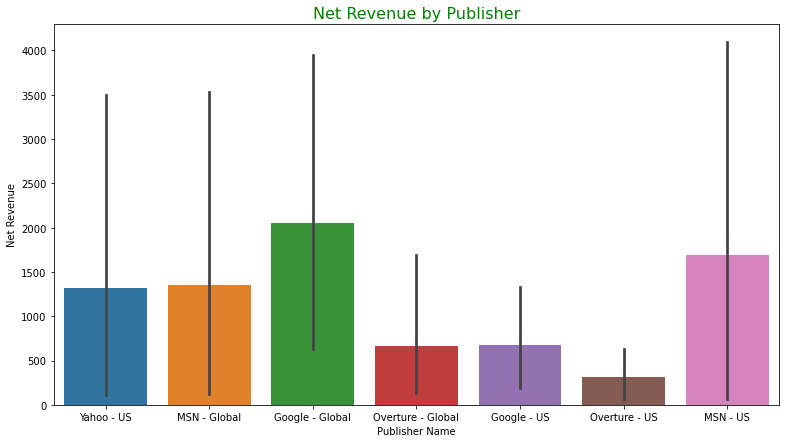

In [116]:
plt.figure(figsize=(13,7))
plt.title("Net Revenue by Publisher", fontsize=16,color="green")
sns.barplot(df["Publisher Name"],y= df["Net Revenue"])
plt.savefig('Air France Barplot')

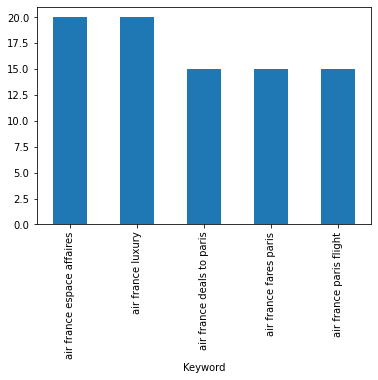

In [117]:
df.groupby(["Keyword"])["Search Engine Bid"].mean().sort_values(ascending=False)[:5].plot.bar()

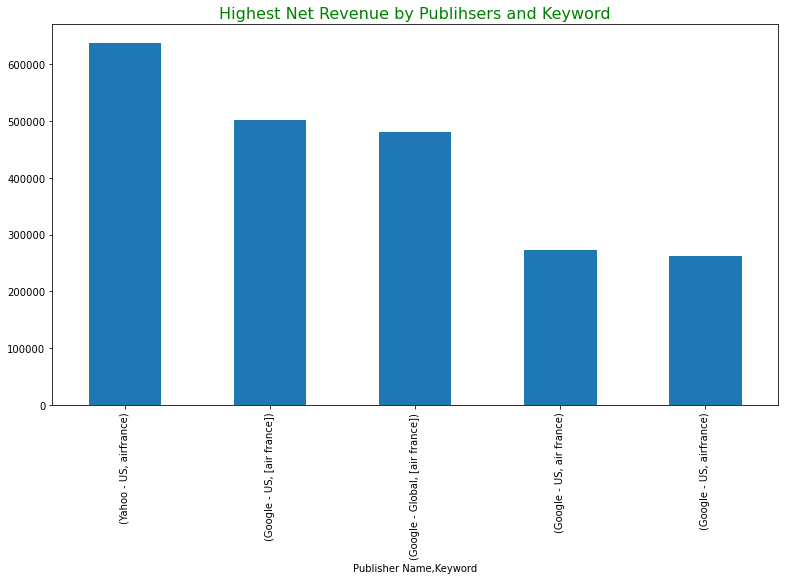

In [118]:
plt.figure(figsize=(13,7))
plt.title("Highest Net Revenue by Publihsers and Keyword", fontsize=16,color="green")
df.groupby(["Publisher Name","Keyword"])["Net Revenue"].sum().sort_values(ascending=False)[:5].plot.bar()
plt.savefig('Air France Highest Net Revenue by Publihsers and Keyword')

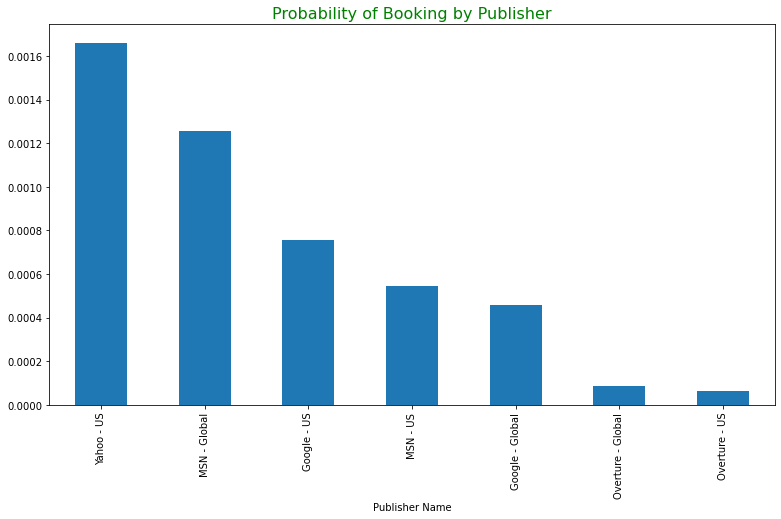

In [119]:
plt.figure(figsize=(13,7))
plt.title("Probability of Booking by Publisher", fontsize=16,color="green")
df.groupby(["Publisher Name"])["Probability of Booking"].mean().sort_values(ascending=False).plot(kind='bar')
plt.savefig('Probability of Booking by Publisher')

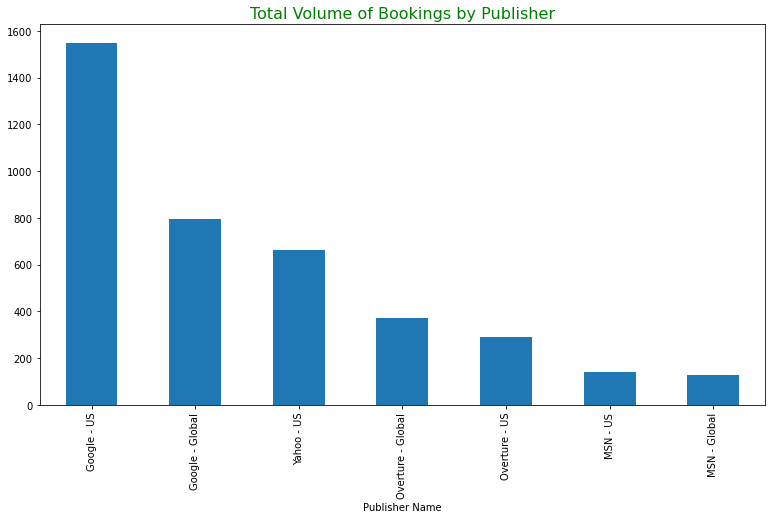

In [120]:
plt.figure(figsize=(13,7))
plt.title("Total Volume of Bookings by Publisher", fontsize=16,color="green")
df.groupby(["Publisher Name"])["Total Volume of Bookings"].sum().sort_values(ascending=False).plot(kind='bar')
plt.savefig('Total Volume of Bookings by Publisher')

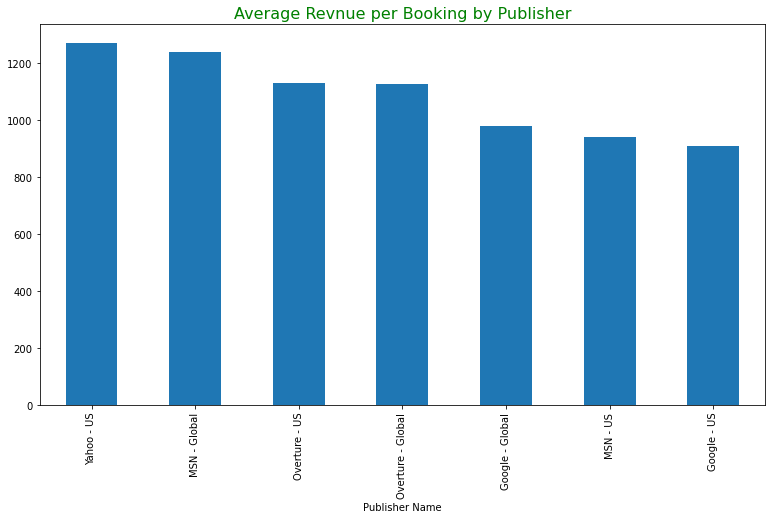

In [121]:
plt.figure(figsize=(13,7))
plt.title("Average Revnue per Booking by Publisher", fontsize=16,color="green")
df.groupby(["Publisher Name"])["Average Revenue per Booking"].mean().sort_values(ascending=False).plot(kind='bar')
plt.savefig('Average Revnue per Booking by Publisher')

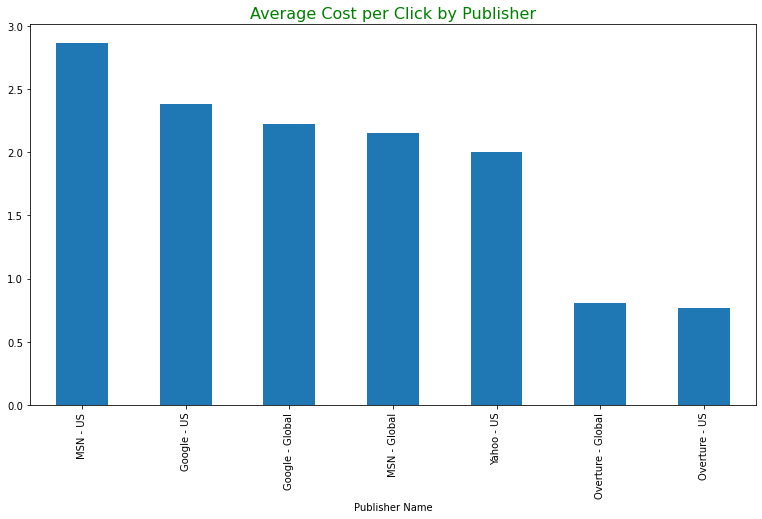

In [122]:
plt.figure(figsize=(13,7))
plt.title("Average Cost per Click by Publisher", fontsize=16,color="green")
df.groupby(["Publisher Name"])['Avg. Cost per Click'].mean().sort_values(ascending=False).plot(kind='bar')
plt.savefig('Average Cost per Click by Publisher')

# Question 2

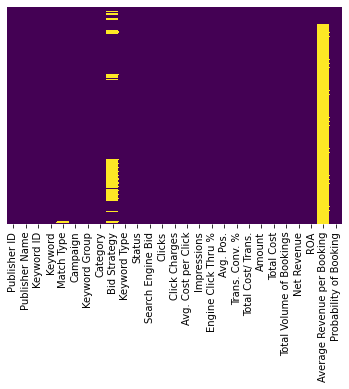

In [123]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [124]:
df['Bid Strategy'].value_counts()

Position 5-10 Bid Strategy    2208
Position 2-5 Bid Strategy      333
Position 1-2 Target            274
Position 1- 3                  264
Position 1-4 Bid Strategy      111
Pos 3-6                         45
Postiion 1-4 Bid Strategy       40
Position 1 -2 Target            11
Name: Bid Strategy, dtype: int64

In [125]:
df['Bid Strategy'] = df['Bid Strategy'].fillna('Position 5-10 Bid Strategy')

In [126]:
df['Match Type'].value_counts()

Broad       2591
Advanced     969
Standard     880
Exact         22
Name: Match Type, dtype: int64

In [127]:
df['Match Type'] = df['Match Type'].fillna('Broad')

In [128]:
df['Average Revenue per Booking'] = df['Average Revenue per Booking'].fillna(0)

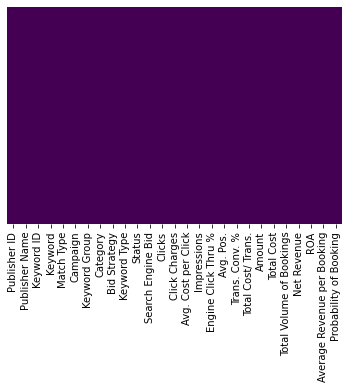

In [129]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [130]:
data_df = df.drop(['Publisher ID','Publisher Name','Keyword ID', 'Match Type', 
                   'Campaign','Keyword Type','Keyword Group','Category','Status', 'ROA',
                  'Average Revenue per Booking','Probability of Booking','Avg. Cost per Click' ], axis=1)

In [131]:
df_corr = data_df.corr(method="pearson")
df_corr.style.background_gradient()

,Search Engine Bid,Clicks,Click Charges,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue
Search Engine Bid,1.000000,0.114934,0.113212,0.023738,0.147721,-0.267877,0.002874,0.039652,0.107165,0.113212,0.114730,0.101718
Clicks,0.114934,1.000000,0.868330,0.400361,-0.014000,-0.021096,0.001533,0.192615,0.830764,0.868330,0.827187,0.789419
Click Charges,0.113212,0.868330,1.000000,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,1.000000,0.539573,0.482530
Impressions,0.023738,0.400361,0.431231,1.000000,-0.026821,-0.005288,-0.001338,0.201258,0.104770,0.431231,0.092177,0.069241
Engine Click Thru %,0.147721,-0.014000,-0.027310,-0.026821,1.000000,-0.221802,0.001666,-0.040646,0.008413,-0.027310,0.009194,0.011397
Avg. Pos.,-0.267877,-0.021096,-0.018533,-0.005288,-0.221802,1.000000,-0.013475,-0.012189,-0.030424,-0.018533,-0.031914,-0.030160
Trans. Conv. %,0.002874,0.001533,-0.000401,-0.001338,0.001666,-0.013475,1.000000,-0.000528,0.014417,-0.000401,0.017679,0.015157
Total Cost/ Trans.,0.039652,0.192615,0.333614,0.201258,-0.040646,-0.012189,-0.000528,1.000000,0.035870,0.333614,0.036950,0.006182
Amount,0.107165,0.830764,0.549963,0.104770,0.008413,-0.030424,0.014417,0.035870,1.000000,0.549963,0.994498,0.996899
Total Cost,0.113212,0.868330,1.000000,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,1.000000,0.539573,0.482530


In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [133]:
data_df['Keyword'] = encoder.fit_transform(data_df['Keyword'])
data_df['Bid Strategy'] = encoder.fit_transform(data_df['Bid Strategy'])
data_df['Search Engine Bid'] = encoder.fit_transform(data_df['Search Engine Bid'])

In [134]:
data_df.head()

,Keyword,Bid Strategy,Search Engine Bid,Clicks,Click Charges,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue
0,1117,6,110,1,2.3125,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.64
1,1463,6,110,1,0.6250,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.58
2,39,5,0,1,0.3875,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1,389.76
3,2,2,112,59,2.3125,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.84
4,111,3,11,8,2.2000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1,932.80


In [135]:
df_corr = data_df.corr(method="pearson")
df_corr = df_corr.style.background_gradient()
df_corr

,Keyword,Bid Strategy,Search Engine Bid,Clicks,Click Charges,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue
Keyword,1.000000,0.050551,0.202031,-0.096287,-0.056346,-0.027586,0.030743,-0.104577,-0.004861,-0.001591,-0.100578,-0.056346,-0.101801,-0.100169
Bid Strategy,0.050551,1.000000,0.227203,-0.033830,-0.044799,-0.018019,0.116744,0.057286,0.004252,-0.085203,-0.013069,-0.044799,-0.012905,-0.009484
Search Engine Bid,0.202031,0.227203,1.000000,0.025373,0.042421,0.017997,0.187064,-0.248728,0.007128,0.038194,0.014577,0.042421,0.015452,0.011290
Clicks,-0.096287,-0.033830,0.025373,1.000000,0.868330,0.400361,-0.014000,-0.021096,0.001533,0.192615,0.830764,0.868330,0.827187,0.789419
Click Charges,-0.056346,-0.044799,0.042421,0.868330,1.000000,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,1.000000,0.539573,0.482530
Impressions,-0.027586,-0.018019,0.017997,0.400361,0.431231,1.000000,-0.026821,-0.005288,-0.001338,0.201258,0.104770,0.431231,0.092177,0.069241
Engine Click Thru %,0.030743,0.116744,0.187064,-0.014000,-0.027310,-0.026821,1.000000,-0.221802,0.001666,-0.040646,0.008413,-0.027310,0.009194,0.011397
Avg. Pos.,-0.104577,0.057286,-0.248728,-0.021096,-0.018533,-0.005288,-0.221802,1.000000,-0.013475,-0.012189,-0.030424,-0.018533,-0.031914,-0.030160
Trans. Conv. %,-0.004861,0.004252,0.007128,0.001533,-0.000401,-0.001338,0.001666,-0.013475,1.000000,-0.000528,0.014417,-0.000401,0.017679,0.015157
Total Cost/ Trans.,-0.001591,-0.085203,0.038194,0.192615,0.333614,0.201258,-0.040646,-0.012189,-0.000528,1.000000,0.035870,0.333614,0.036950,0.006182


In [136]:
# the independent variables set
X = data_df.drop(['Total Cost'], axis=1)
  
vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Keyword,4.629368e+00
1,Bid Strategy,1.134464e+01
2,Search Engine Bid,7.002215e+00
3,Clicks,1.967322e+01
4,Click Charges,2.021001e+11
5,Impressions,1.589246e+00
6,Engine Click Thru %,1.415446e+00
7,Avg. Pos.,3.976546e+00
8,Trans. Conv. %,1.004371e+00
9,Total Cost/ Trans.,1.216373e+00


### Interpreting Multicollinearity Results
Using vif and pearson correlation it was determined that the independant variables Click Charges, Net Revenue, Total Volume of Bookings, and Search Engine Bid are highly correlated to other variables as such they will be removed.

***REVISON ADDED CLICKS AND BID STATEGY TO REMOVED IVs for MULTICOLLINEARITY***

In [137]:
data_df = data_df.drop(['Clicks','Bid Strategy','Click Charges','Net Revenue','Total Volume of Bookings',
                       'Search Engine Bid'], axis=1)

In [138]:
# the independent variables set
X = data_df.drop(['Total Cost'], axis=1)
  
vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Keyword,2.599095
1,Impressions,1.055874
2,Engine Click Thru %,1.246239
3,Avg. Pos.,2.338015
4,Trans. Conv. %,1.001522
5,Total Cost/ Trans.,1.057050
6,Amount,1.016687


### Attempt 1 
Using all the variables

In [139]:
import statsmodels.api as sm

In [140]:
X = data_df.drop(['Total Cost'], axis=1)
y = data_df['Total Cost']

In [141]:
indepvar = sm.add_constant(X)

In [142]:
model_1=sm.OLS(y,indepvar)
res1=model_1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     652.2
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        20:37:11   Log-Likelihood:                -37302.
No. Observations:                4510   AIC:                         7.462e+04
Df Residuals:                    4502   BIC:                         7.467e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  55.9613    

#### dropping values with a p-value greater than .05 because they don't have any statistical significance

In [143]:
X = X.drop(['Engine Click Thru %','Avg. Pos.','Trans. Conv. %','Keyword'], axis=1)
y = data_df['Total Cost']

In [144]:
indepvar = sm.add_constant(X)

In [145]:
model_2=sm.OLS(y,indepvar)
res2=model_2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1522.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        20:37:11   Log-Likelihood:                -37303.
No. Observations:                4510   AIC:                         7.461e+04
Df Residuals:                    4506   BIC:                         7.464e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 55.4855     14

In [146]:
vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

              feature       VIF
0         Impressions  1.055201
1  Total Cost/ Trans.  1.044874
2              Amount  1.012330
